In [1]:
import pandas as pd
from collections import defaultdict
import numpy as np

In [2]:
feat_mean_df = pd.read_csv("feat_50.csv")

In [11]:
feat_mean_df_trans = feat_mean_df.T

In [15]:
feat_mean_df_trans

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.003208,0.003229,0.003197,0.003183,0.003151,0.003127,0.003086,0.003098,0.003161,0.003131,...,0.003083,0.003070,0.003138,0.003083,0.003094,0.003042,0.003114,0.003115,0.003087,0.003058
1,0.002525,0.002578,0.002486,0.002430,0.002245,0.002362,0.002346,0.002386,0.002404,0.002485,...,0.001968,0.002038,0.002031,0.001915,0.002073,0.002091,0.001995,0.001984,0.001943,0.002052
2,0.000272,0.000024,0.000528,0.000596,0.001292,0.000856,-0.000079,0.000863,0.001310,-0.000055,...,0.000316,0.000689,-0.000665,0.000544,-0.000511,-0.000830,-0.000100,-0.001253,-0.002498,-0.002192
3,0.000362,0.000411,-0.000124,0.000012,0.000851,0.001888,0.000635,0.000644,0.001735,0.000549,...,0.000022,-0.000195,-0.000047,0.000993,0.000387,0.000088,-0.001570,-0.002213,-0.001731,-0.001432
4,0.002756,0.002466,0.002250,0.002463,0.002694,0.002588,0.002279,0.002382,0.002598,0.002615,...,0.001908,0.001958,0.001760,0.001936,0.001782,0.001722,0.001572,0.001894,0.001768,0.001909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,0.023329,0.013136,-0.001066,-0.005177,-0.006042,-0.003997,-0.020031,-0.006148,-0.000543,-0.003526,...,-0.003686,0.008909,0.008916,0.003854,0.026688,0.011039,0.003573,0.003105,0.005090,-0.005606
187,0.002993,0.002762,0.002877,0.002877,0.003054,0.002812,0.002817,0.002689,0.002761,0.002788,...,0.002643,0.002733,0.002754,0.002709,0.002695,0.002721,0.003092,0.003302,0.003108,0.002956
188,-0.001278,-0.003435,-0.003280,-0.000605,0.000312,-0.001462,-0.001988,0.000252,-0.002947,-0.000299,...,-0.003025,-0.003141,-0.000552,-0.000130,0.000629,0.001399,0.000327,0.000889,0.000355,0.001086
189,0.003292,0.002879,0.002933,0.002520,0.001744,0.002026,0.001647,0.001795,0.002392,0.002660,...,0.001254,0.001100,0.001779,0.001256,0.002725,0.001888,0.000959,0.000335,0.000588,0.000158


In [19]:
feat_mean_df_trans.to_csv("feat_50_t.csv", sep=";", index=False)

### t-SNE feature-mean visualization

In [4]:
keys = list(feat_mean_df.columns)

In [5]:
from sklearn.manifold import TSNE
import seaborn as sns
import colorcet as cc

In [6]:
x = []
for i_key in sorted(keys):
    x.append(list(feat_mean_df[i_key]))

In [7]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x) 

/Users/pawnesh/ws/covid_data_science/covid_19_data_stats/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/pawnesh/ws/covid_data_science/covid_19_data_stats/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 142 samples in 0.001s...
[t-SNE] Computed neighbors for 142 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 142 / 142
[t-SNE] Mean sigma: 0.012296
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.716656
[t-SNE] KL divergence after 950 iterations: 0.459159


In [8]:
len(x)

142

[Text(0.5, 1.0, 'Data T-SNE projection')]

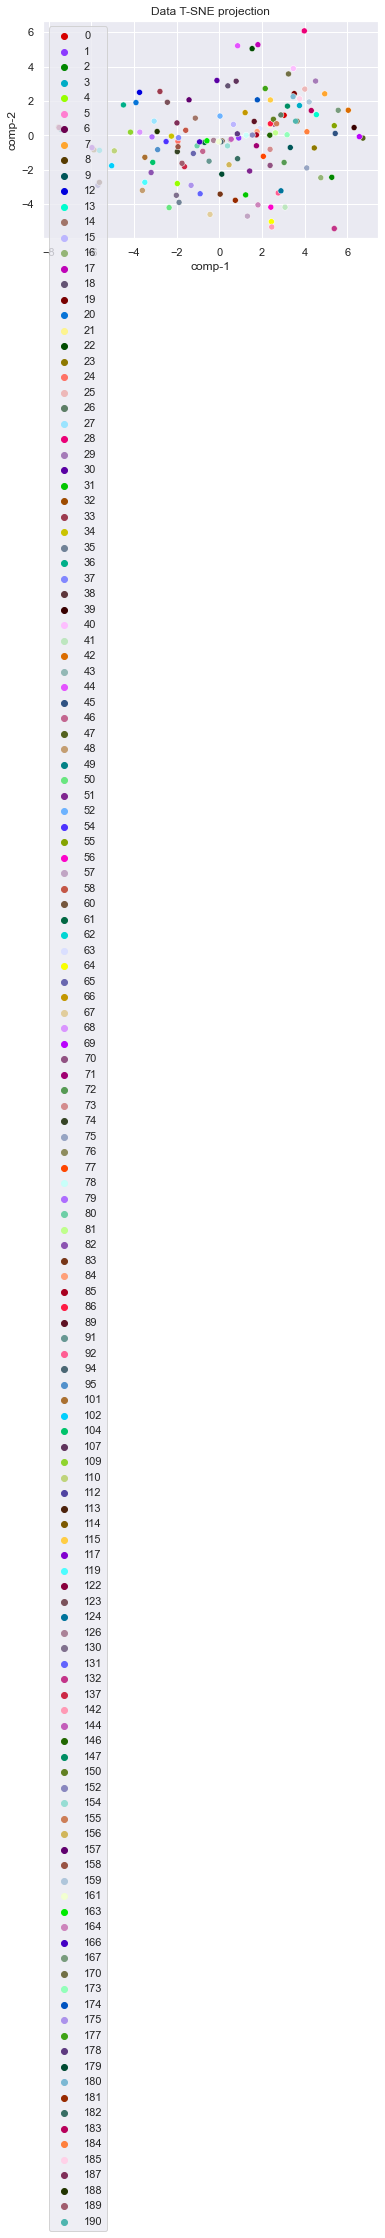

In [9]:
t_sne_df = pd.DataFrame()
t_sne_df["y"] = list(feat_mean_df.columns)
t_sne_df["comp-1"] = z[:,0]
t_sne_df["comp-2"] = z[:,1]

sns.set(rc={'figure.figsize':(20,10)})

sns.scatterplot(x="comp-1", y="comp-2", hue=t_sne_df.y.tolist(),
                palette=sns.color_palette(cc.glasbey, len(keys)),
                data=t_sne_df).set(title="Data T-SNE projection")

## Clustering 

In [10]:
X = feat_mean_df[sorted(keys)]

In [11]:
X.shape

(256, 142)

In [12]:
X = X.T

In [13]:
X.shape

(142, 256)

/Users/pawnesh/ws/covid_data_science/covid_19_data_stats/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/pawnesh/ws/covid_data_science/covid_19_data_stats/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/pawnesh/ws/covid_data_science/covid_19_data_stats/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/pawnesh/ws/covid_data_science/covid_19_data_stats/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: Future

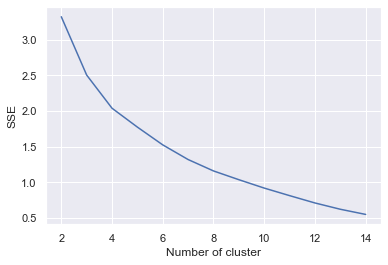

In [14]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = {}
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    X["clusters"] = kmeans.labels_
    k_label = kmeans.labels_
    #print(X["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [15]:
X.shape

(142, 257)

### K-means with silhouette

In [16]:
X = feat_mean_df[sorted(keys)].copy().T

In [17]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


   
for n_cluster in range(2, 20):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))



For n_clusters=2, The Silhouette Coefficient is 0.8634786960293958
For n_clusters=3, The Silhouette Coefficient is 0.8283806285655955
For n_clusters=4, The Silhouette Coefficient is 0.8269569546752076
For n_clusters=5, The Silhouette Coefficient is 0.8229903343788941
For n_clusters=6, The Silhouette Coefficient is 0.7474482004216376
For n_clusters=7, The Silhouette Coefficient is 0.7477920000337448
For n_clusters=8, The Silhouette Coefficient is 0.7393555300362448
For n_clusters=9, The Silhouette Coefficient is 0.7367563862810839
For n_clusters=10, The Silhouette Coefficient is 0.7072465036901653
For n_clusters=11, The Silhouette Coefficient is 0.6564835488223116
For n_clusters=12, The Silhouette Coefficient is 0.6956587998723902
For n_clusters=13, The Silhouette Coefficient is 0.6595232268394093
For n_clusters=14, The Silhouette Coefficient is 0.48343267765511494
For n_clusters=15, The Silhouette Coefficient is 0.5089374793500364
For n_clusters=16, The Silhouette Coefficient is 0.5493

### Classes clusters

In [18]:
classes_df = pd.read_csv("./configs/_base_/class_mapping/universal_classes.csv", sep=";")
CLASSES= {}
for key, value in zip(classes_df["class_id"], classes_df["class_name"]):
    CLASSES[key] = value

In [19]:
CLASSES

{0: 'ignore',
 1: 'car',
 2: 'bicycle',
 3: 'bus',
 4: 'truck',
 5: 'train',
 6: 'caravan',
 7: 'trailer',
 8: 'motorcycle',
 9: 'ego_vehicle',
 10: 'wheeled_slow',
 11: 'boat',
 12: 'other-vehicles',
 13: 'road',
 14: 'sidewalk',
 15: 'parking',
 16: 'rail_track',
 17: 'pedestrian_area',
 18: 'crosswalk_plain',
 19: 'bike_lane',
 20: 'service_lane',
 21: 'curb',
 22: 'general_marking',
 23: 'zebra_marking',
 24: 'snow',
 25: 'water',
 26: 'sand',
 27: 'building',
 28: 'fence',
 29: 'wall',
 30: 'bridge',
 31: 'tunnel',
 32: 'guard_rail',
 33: 'barrier',
 34: 'vegetation',
 35: 'terrain',
 36: 'sky',
 37: 'mountain',
 38: 'pole',
 39: 'utility_pole',
 40: 'traffic_sign',
 41: 'traffic_light',
 42: 'street_light',
 43: 'billboard',
 44: 'manhole',
 45: 'banner',
 46: 'trash_can',
 47: 'catch_basin',
 48: 'junction_box',
 49: 'cctv_camera',
 50: 'fire_hydrant',
 51: 'bench',
 52: 'mailbox',
 53: 'pothole',
 54: 'phone_booth',
 55: 'traffic_sign_frame',
 56: 'person',
 57: 'motorcyclist',

In [20]:
key_index = sorted(keys)
target = label

In [21]:
classes_cluster = defaultdict(list)
for key_i, key_t in zip(key_index, target):
    classes_cluster[key_t].append(key_i)

In [22]:
classes_cluster

defaultdict(list,
            {2: ['0',
              '1',
              '102',
              '104',
              '109',
              '110',
              '112',
              '113',
              '114',
              '115',
              '117',
              '119',
              '12',
              '123',
              '124',
              '126',
              '13',
              '130',
              '131',
              '132',
              '137',
              '14',
              '142',
              '146',
              '147',
              '15',
              '152',
              '154',
              '155',
              '157',
              '159',
              '16',
              '161',
              '163',
              '167',
              '17',
              '170',
              '175',
              '177',
              '178',
              '179',
              '18',
              '180',
              '181',
              '182',
              '183',
              '184',
   

### Hierarchical clustering

In [23]:
X = feat_mean_df[sorted(keys)].copy().T
y=sorted(keys)

In [24]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster

In [25]:
hier_comp = linkage(X, method='complete', metric='euclidean')
hier_average = linkage(X, method='average', metric='euclidean')
hier_ward = linkage(X, method='ward', metric='euclidean')

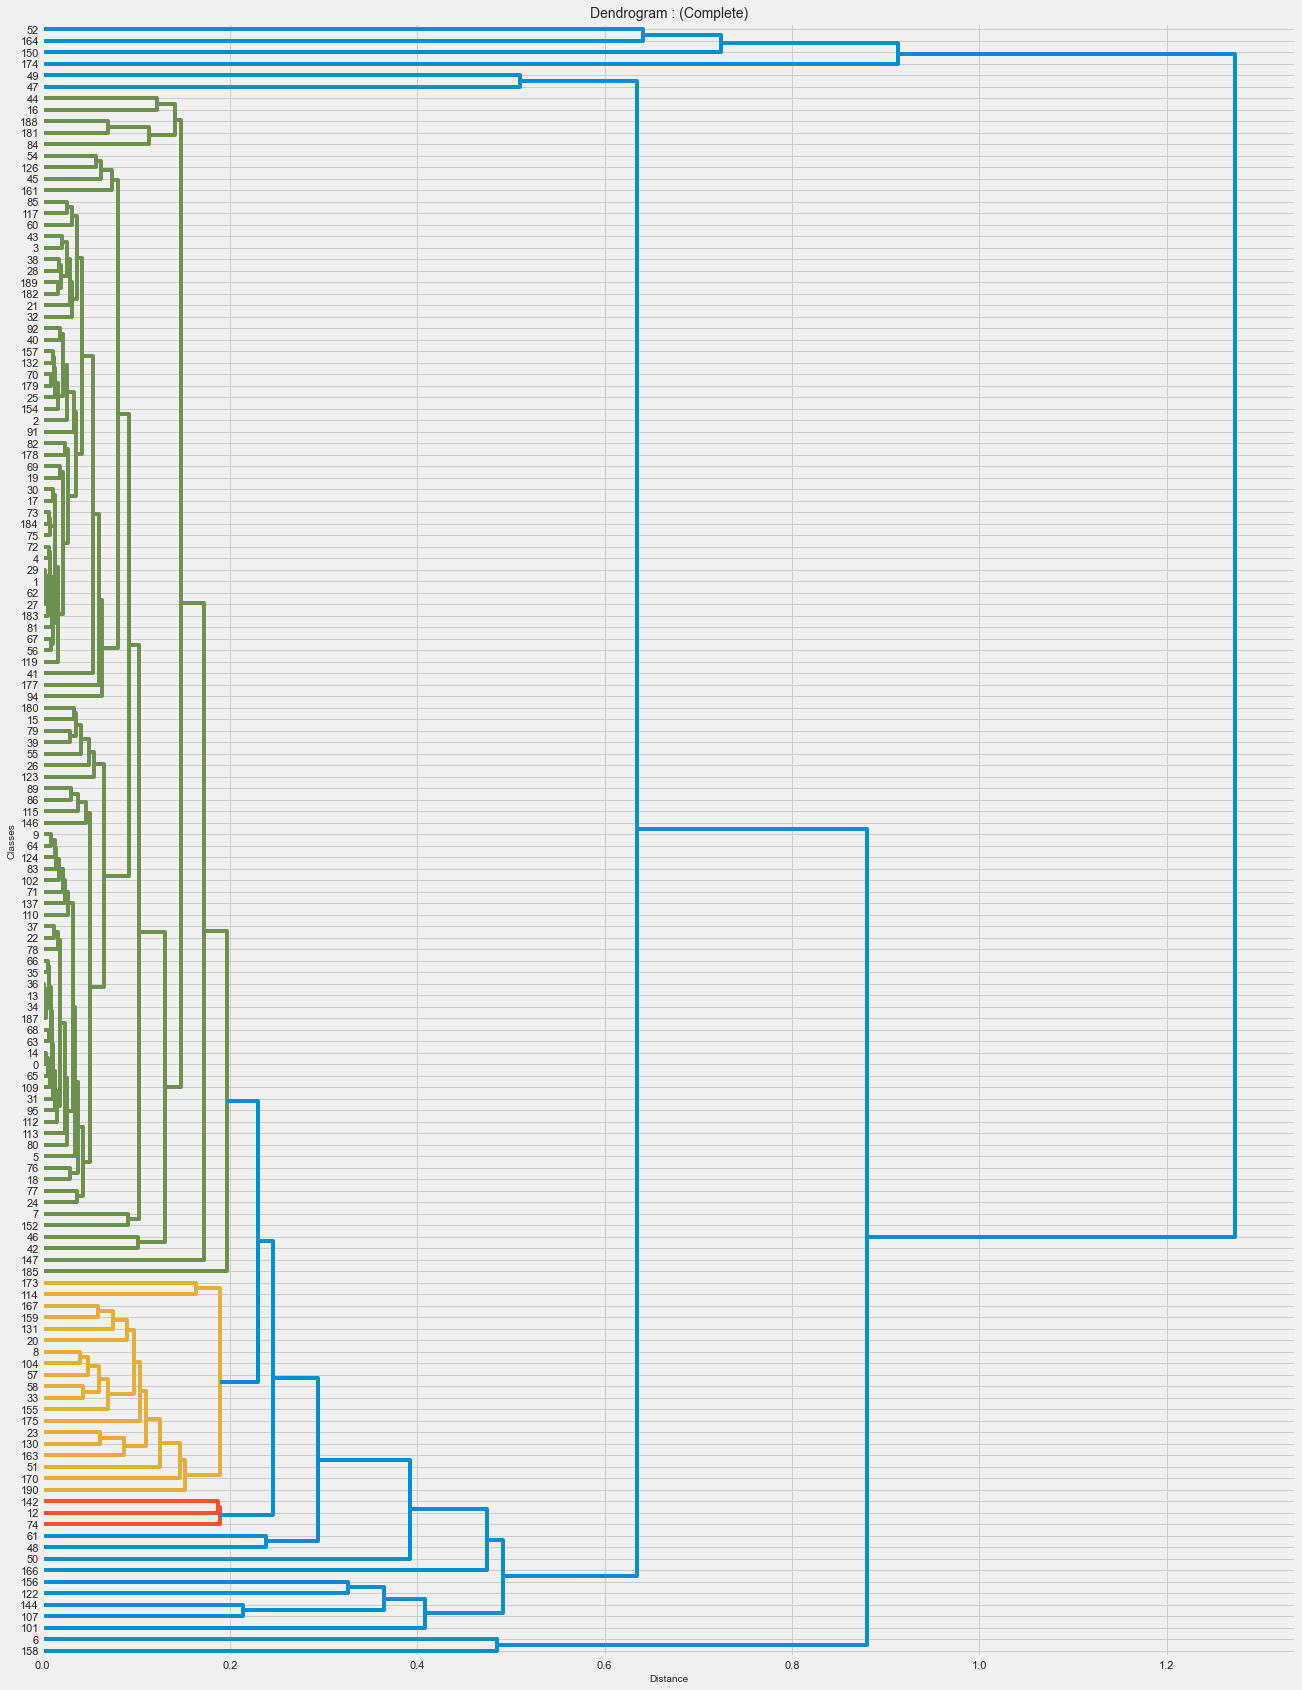

In [26]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(20, 28))
plt.title('Dendrogram : (Complete)', fontsize=14)
plt.xlabel('Distance', fontsize=10)
plt.ylabel('Classes', fontsize=10)
dendrogram(
    hier_comp,
    orientation='right',
    #     leaf_rotation=90.,
    leaf_font_size=20,
    labels=y,
    color_threshold=0.2
)
plt.yticks(fontsize=11)
plt.show()

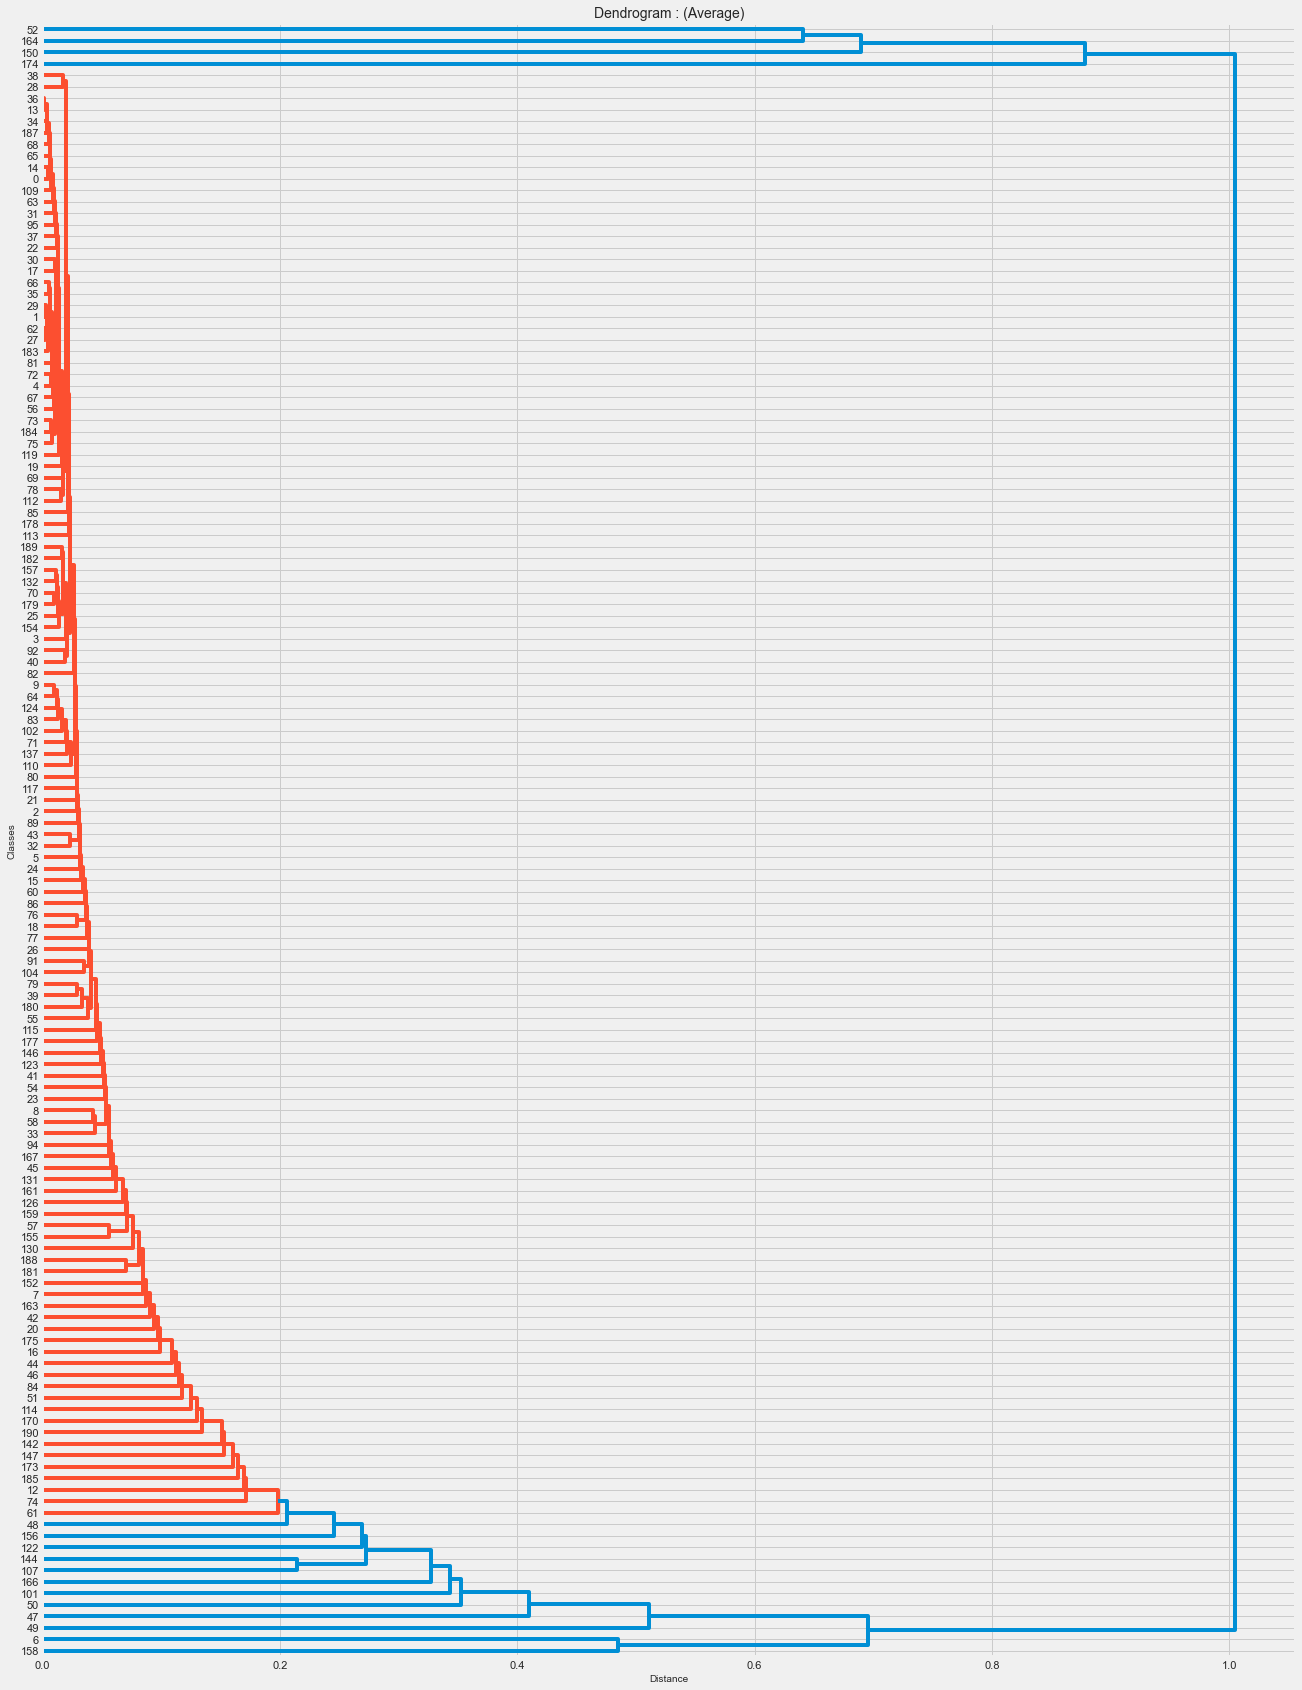

In [27]:
plt.figure(figsize=(20, 28))
plt.title('Dendrogram : (Average)', fontsize=14)
plt.xlabel('Distance', fontsize=10)
plt.ylabel('Classes', fontsize=10)
dendrogram(
    hier_average,
    orientation='right',
    #     leaf_rotation=90.,
    leaf_font_size=20,
    labels=y,
    color_threshold=0.2
)
plt.yticks(fontsize=11)
plt.show()

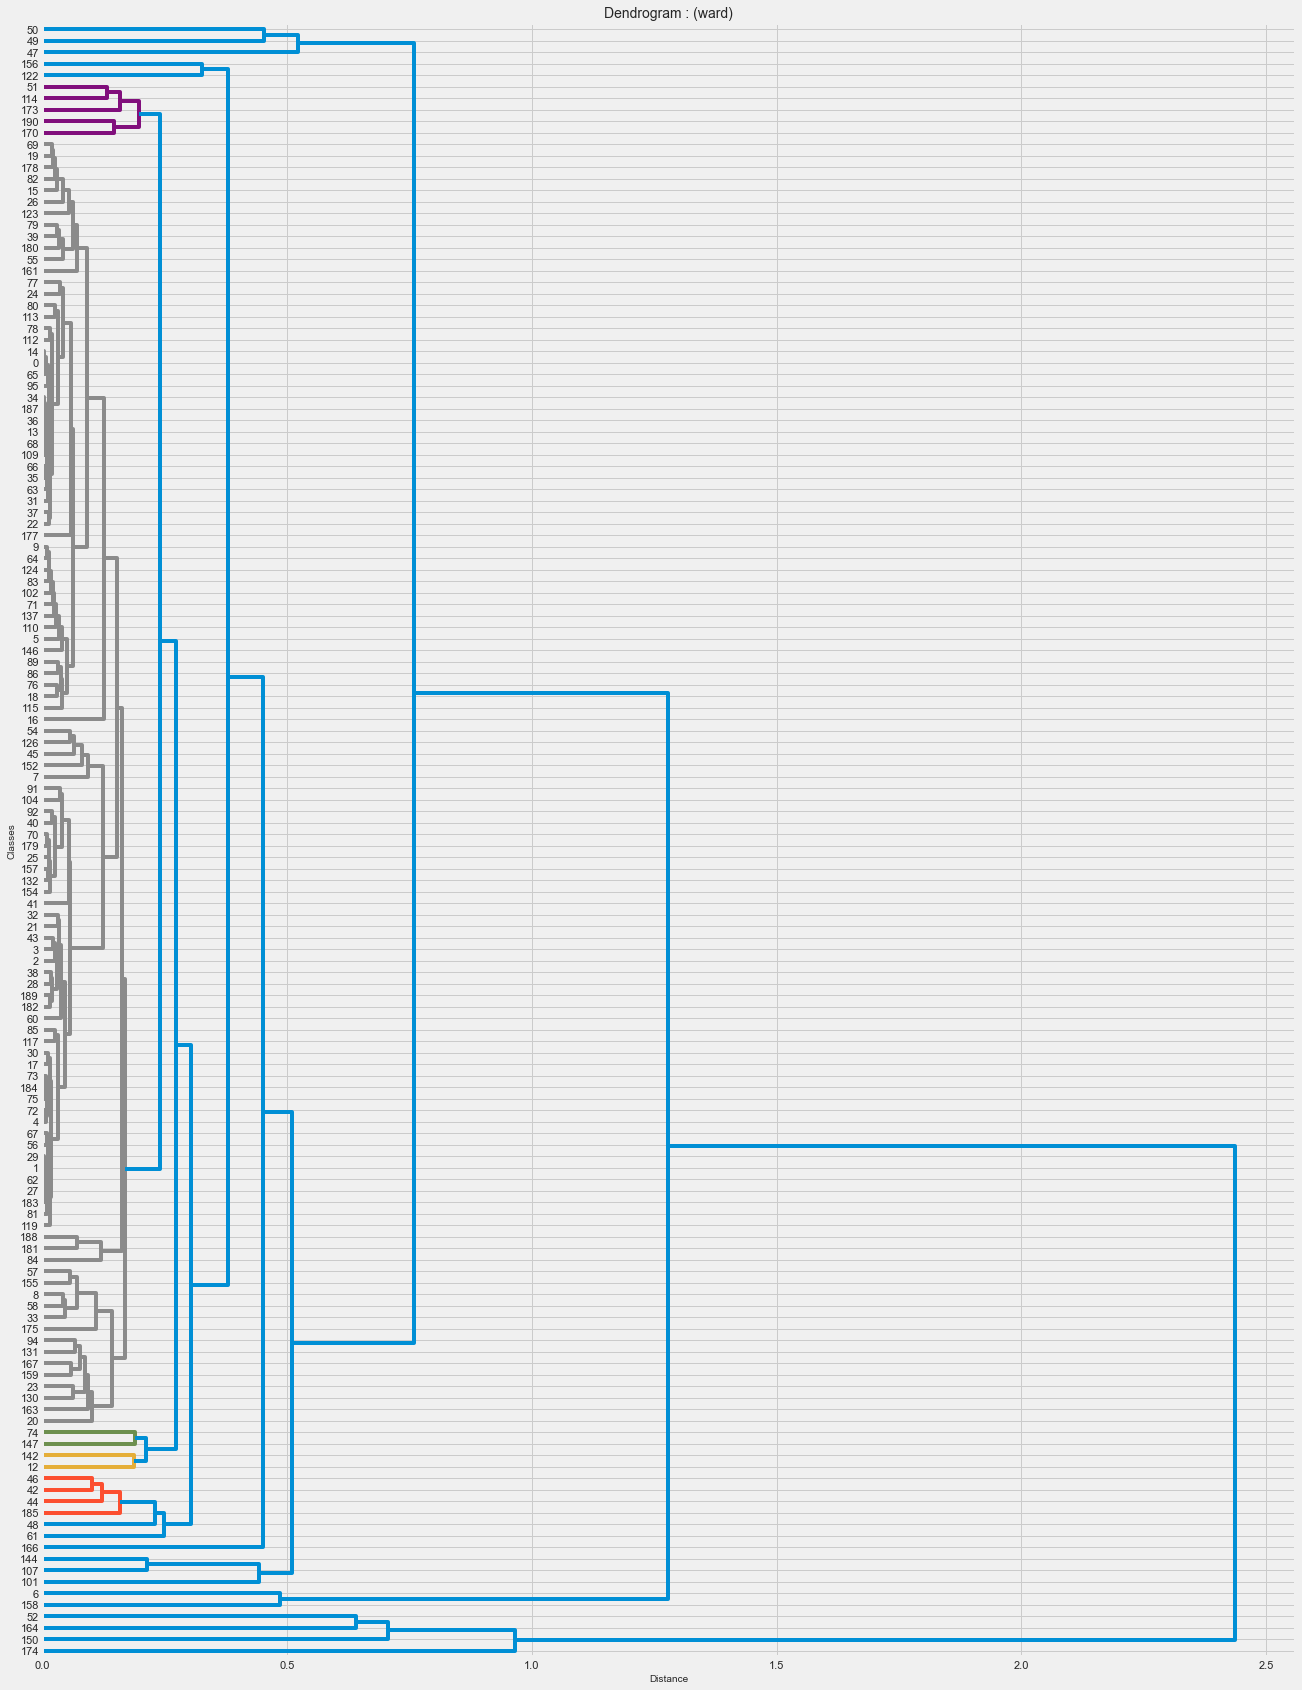

In [28]:
plt.figure(figsize=(20, 28))
plt.title('Dendrogram : (ward)', fontsize=14)
plt.xlabel('Distance', fontsize=10)
plt.ylabel('Classes', fontsize=10)
dendrogram(
    hier_ward,
    orientation='right',
    #     leaf_rotation=90.,
    leaf_font_size=20,
    labels=y,
    color_threshold=0.2
)
plt.yticks(fontsize=11)
plt.show()

### Balanced Clustering 
source: https://github.com/zhu-he/regularized-k-means

In [20]:
feat_mean_df_t = pd.read_csv("feat_50_t.csv", sep=";")

In [21]:
feat_mean_df_t

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.003208,0.003229,0.003197,0.003183,0.003151,0.003127,0.003086,0.003098,0.003161,0.003131,...,0.003083,0.003070,0.003138,0.003083,0.003094,0.003042,0.003114,0.003115,0.003087,0.003058
1,0.002525,0.002578,0.002486,0.002430,0.002245,0.002362,0.002346,0.002386,0.002404,0.002485,...,0.001968,0.002038,0.002031,0.001915,0.002073,0.002091,0.001995,0.001984,0.001943,0.002052
2,0.000272,0.000024,0.000528,0.000596,0.001292,0.000856,-0.000079,0.000863,0.001310,-0.000055,...,0.000316,0.000689,-0.000665,0.000544,-0.000511,-0.000830,-0.000100,-0.001253,-0.002498,-0.002192
3,0.000362,0.000411,-0.000124,0.000012,0.000851,0.001888,0.000635,0.000644,0.001735,0.000549,...,0.000022,-0.000195,-0.000047,0.000993,0.000387,0.000088,-0.001570,-0.002213,-0.001731,-0.001432
4,0.002756,0.002466,0.002250,0.002463,0.002694,0.002588,0.002279,0.002382,0.002598,0.002615,...,0.001908,0.001958,0.001760,0.001936,0.001782,0.001722,0.001572,0.001894,0.001768,0.001909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,0.023329,0.013136,-0.001066,-0.005177,-0.006042,-0.003997,-0.020031,-0.006148,-0.000543,-0.003526,...,-0.003686,0.008909,0.008916,0.003854,0.026688,0.011039,0.003573,0.003105,0.005090,-0.005606
138,0.002993,0.002762,0.002877,0.002877,0.003054,0.002812,0.002817,0.002689,0.002761,0.002788,...,0.002643,0.002733,0.002754,0.002709,0.002695,0.002721,0.003092,0.003302,0.003108,0.002956
139,-0.001278,-0.003435,-0.003280,-0.000605,0.000312,-0.001462,-0.001988,0.000252,-0.002947,-0.000299,...,-0.003025,-0.003141,-0.000552,-0.000130,0.000629,0.001399,0.000327,0.000889,0.000355,0.001086
140,0.003292,0.002879,0.002933,0.002520,0.001744,0.002026,0.001647,0.001795,0.002392,0.002660,...,0.001254,0.001100,0.001779,0.001256,0.002725,0.001888,0.000959,0.000335,0.000588,0.000158


In [47]:
! /Users/pawnesh/ws/regularized-k-means/build/regularized-k-means 'hard' "feat_50_t.csv" 10 -r 1000 -a cluster_out/out.csv

Sum of Squares: 0.00726694
Used Time: 0.000769103
Sum of Squares: 0.00726319
Used Time: 0.00085255
Sum of Squares: 0.00727459
Used Time: 0.00093712
Sum of Squares: 0.00726884
Used Time: 0.000786121
Sum of Squares: 0.00726907
Used Time: 0.000851743
Sum of Squares: 0.0072804
Used Time: 0.000940208
Sum of Squares: 0.00726822
Used Time: 0.000743078
Sum of Squares: 0.00727073
Used Time: 0.000671749
Sum of Squares: 0.00727309
Used Time: 0.000570265
Sum of Squares: 0.00727337
Used Time: 0.000633315
Sum of Squares: 0.00726797
Used Time: 0.000687398
Sum of Squares: 0.00726602
Used Time: 0.000660262
Sum of Squares: 0.00727366
Used Time: 0.000641465
Sum of Squares: 0.00726853
Used Time: 0.00083966
Sum of Squares: 0.00726679
Used Time: 0.000750989
Sum of Squares: 0.00726732
Used Time: 0.000747016
Sum of Squares: 0.00727622
Used Time: 0.000711992
Sum of Squares: 0.00726796
Used Time: 0.000872279
Sum of Squares: 0.00726833
Used Time: 0.00064316
Sum of Squares: 0.00727734
Used Time: 0.000586301
Sum o

Sum of Squares: 0.00727063
Used Time: 0.000487247
Sum of Squares: 0.00726916
Used Time: 0.000540818
Sum of Squares: 0.00726784
Used Time: 0.000687718
Sum of Squares: 0.00727331
Used Time: 0.000610533
Sum of Squares: 0.00726865
Used Time: 0.000660752
Sum of Squares: 0.00727573
Used Time: 0.000524964
Sum of Squares: 0.00727562
Used Time: 0.000451204
Sum of Squares: 0.00727667
Used Time: 0.000476299
Sum of Squares: 0.00727148
Used Time: 0.000557061
Sum of Squares: 0.00726663
Used Time: 0.000533379
Sum of Squares: 0.00727144
Used Time: 0.000446509
Sum of Squares: 0.00730513
Used Time: 0.000559692
Sum of Squares: 0.00727327
Used Time: 0.00052863
Sum of Squares: 0.00726716
Used Time: 0.000519123
Sum of Squares: 0.00727401
Used Time: 0.000490763
Sum of Squares: 0.00726496
Used Time: 0.000572137
Sum of Squares: 0.00727122
Used Time: 0.000498815
Sum of Squares: 0.00726928
Used Time: 0.000596195
Sum of Squares: 0.00726568
Used Time: 0.000535841
Sum of Squares: 0.00726659
Used Time: 0.000574056
S

Sum of Squares: 0.00726736
Used Time: 0.000514605
Sum of Squares: 0.00727116
Used Time: 0.000634171
Sum of Squares: 0.00727428
Used Time: 0.000592315
Sum of Squares: 0.00727261
Used Time: 0.00062257
Sum of Squares: 0.00726796
Used Time: 0.000473958
Sum of Squares: 0.00727714
Used Time: 0.000447421
Sum of Squares: 0.007275
Used Time: 0.000491325
Sum of Squares: 0.00727346
Used Time: 0.00053322
Sum of Squares: 0.00727125
Used Time: 0.000578211
Sum of Squares: 0.00726715
Used Time: 0.000494783
Sum of Squares: 0.00726684
Used Time: 0.000566849
Sum of Squares: 0.00726948
Used Time: 0.000586376
Sum of Squares: 0.00727385
Used Time: 0.000608618
Sum of Squares: 0.00727078
Used Time: 0.000587533
Sum of Squares: 0.00726996
Used Time: 0.000505738
Sum of Squares: 0.00727022
Used Time: 0.000555147
Sum of Squares: 0.00727115
Used Time: 0.000562525
Sum of Squares: 0.00728115
Used Time: 0.000586854
Sum of Squares: 0.0072685
Used Time: 0.000530146
Sum of Squares: 0.00726937
Used Time: 0.000461822
Sum o

Sum of Squares: 0.00726585
Used Time: 0.000700444
Sum of Squares: 0.00727034
Used Time: 0.000714881
Sum of Squares: 0.0072704
Used Time: 0.000821213
Sum of Squares: 0.00726633
Used Time: 0.000782388
Sum of Squares: 0.00726826
Used Time: 0.000843962
Sum of Squares: 0.00727178
Used Time: 0.000576719
Sum of Squares: 0.0072693
Used Time: 0.000696382
Sum of Squares: 0.00727971
Used Time: 0.000880231
Sum of Squares: 0.00726866
Used Time: 0.000778933
Sum of Squares: 0.00726933
Used Time: 0.000661346
Sum of Squares: 0.00726854
Used Time: 0.000690191
Sum of Squares: 0.00727
Used Time: 0.000690673
Sum of Squares: 0.00726898
Used Time: 0.000707831
Sum of Squares: 0.00726897
Used Time: 0.000938061
Sum of Squares: 0.00727319
Used Time: 0.000678588
Sum of Squares: 0.00726714
Used Time: 0.000704076
Sum of Squares: 0.00726721
Used Time: 0.000731241
Sum of Squares: 0.00726936
Used Time: 0.000813525
Sum of Squares: 0.00727354
Used Time: 0.000855529
Sum of Squares: 0.00727415
Used Time: 0.000840583
Sum o

Sum of Squares: 0.00727384
Used Time: 0.000507849
Sum of Squares: 0.00727272
Used Time: 0.000459666
Sum of Squares: 0.00726517
Used Time: 0.000658169
Sum of Squares: 0.0072856
Used Time: 0.000828986
Sum of Squares: 0.00726989
Used Time: 0.000468693
Sum of Squares: 0.00727753
Used Time: 0.000408567
Sum of Squares: 0.00726813
Used Time: 0.00057539
Sum of Squares: 0.0072782
Used Time: 0.000497729
Sum of Squares: 0.00726927
Used Time: 0.00046137
Sum of Squares: 0.00728067
Used Time: 0.000492759
Sum of Squares: 0.00727301
Used Time: 0.000576127
Sum of Squares: 0.00726665
Used Time: 0.000446061
Sum of Squares: 0.00726937
Used Time: 0.0005636
Sum of Squares: 0.00727095
Used Time: 0.000525884
Sum of Squares: 0.00726773
Used Time: 0.000642019
Sum of Squares: 0.00726987
Used Time: 0.000554552
Sum of Squares: 0.00726809
Used Time: 0.000475378
Sum of Squares: 0.00727176
Used Time: 0.00047094
Sum of Squares: 0.00726576
Used Time: 0.000522058
Sum of Squares: 0.00727478
Used Time: 0.000531575
Sum of 

Sum of Squares: 0.00726961
Used Time: 0.000769459
Sum of Squares: 0.00726576
Used Time: 0.000700194
Sum of Squares: 0.00727006
Used Time: 0.000597579
Sum of Squares: 0.00727555
Used Time: 0.000501966
Sum of Squares: 0.00726851
Used Time: 0.000433237
Sum of Squares: 0.00727421
Used Time: 0.000486375
Sum of Squares: 0.00727268
Used Time: 0.000452588
Sum of Squares: 0.00726791
Used Time: 0.00051099
Sum of Squares: 0.0072734
Used Time: 0.00048188
Sum of Squares: 0.0072697
Used Time: 0.000594657
Sum of Squares: 0.00726886
Used Time: 0.000525098
Sum of Squares: 0.007275
Used Time: 0.000465883
Sum of Squares: 0.00726831
Used Time: 0.000520177
Sum of Squares: 0.00727319
Used Time: 0.000431875
Sum of Squares: 0.00727234
Used Time: 0.000545338
Sum of Squares: 0.00728503
Used Time: 0.000438806
Sum of Squares: 0.00727059
Used Time: 0.000522472
Sum of Squares: 0.00726941
Used Time: 0.000523658
Sum of Squares: 0.00726877
Used Time: 0.000600825
Sum of Squares: 0.00726868
Used Time: 0.000527919
Sum of

In [48]:
c_label = pd.read_csv("cluster_out/out.csv-999.csv")

In [49]:
c_label=c_label.to_numpy()

In [50]:
label_nmp=c_label.reshape(1, -1)

In [59]:
label = label_nmp.tolist()[0]

In [52]:
np.unique(label_nmp, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([15, 14, 13, 14, 15, 15, 14, 14, 14, 14]))

In [53]:
classes_df = pd.read_csv("./configs/_base_/class_mapping/universal_classes.csv", sep=";")
CLASSES= {}
for key, value in zip(classes_df["class_id"], classes_df["class_name"]):
    CLASSES[key] = value

In [60]:
key_index = sorted(keys)
target = label

In [66]:
classes_cluster = defaultdict(list)
for key_i, key_t in zip(key_index, target):
    classes_cluster[key_t].append(int(key_i))

In [67]:
classes_cluster

defaultdict(list,
            {9: [0, 117, 12, 130, 131, 156, 189, 2, 20, 3, 33, 40, 57, 83],
             7: [1, 102, 110, 114, 132, 146, 173, 180, 21, 23, 24, 36, 47, 82],
             3: [101, 13, 137, 14, 16, 185, 19, 190, 28, 29, 38, 39, 4, 50],
             0: [104,
              115,
              119,
              142,
              144,
              150,
              152,
              154,
              157,
              188,
              35,
              55,
              8,
              86,
              94],
             4: [107,
              155,
              158,
              167,
              27,
              42,
              43,
              45,
              48,
              51,
              60,
              68,
              84,
              89,
              91],
             2: [109, 17, 179, 41, 49, 56, 58, 61, 62, 65, 66, 70, 92],
             6: [112, 123, 161, 170, 18, 181, 25, 30, 34, 44, 5, 76, 77, 80],
             5: [113,
              12

In [70]:
classes_cluster_w_name = {}
for i_k, i_v in classes_cluster.items():
    classes_cluster_w_name[CLASSES[i_k]] = []
    for i_vk in i_v:
        classes_cluster_w_name[CLASSES[i_k]].append(CLASSES[i_vk])

In [71]:
classes_cluster_w_name

{'ego_vehicle': ['ignore',
  'computer',
  'other-vehicles',
  'bannister',
  'ottoman',
  'pot',
  'bird',
  'bicycle',
  'service_lane',
  'bus',
  'barrier',
  'traffic_sign',
  'motorcyclist',
  'Wardrobe'],
 'trailer': ['car',
  'pillow',
  'flower',
  'stove',
  'bottle',
  'Tent',
  'glass-drinking',
  'all_road_marking',
  'curb',
  'zebra_marking',
  'snow',
  'sky',
  'catch_basin',
  'Rock'],
 'bus': ['Pool-billiard',
  'road',
  'conveyerbelt',
  'sidewalk',
  'rail_track',
  'traffic_sign_back',
  'bike_lane',
  'curb_cut',
  'fence',
  'wall',
  'pole',
  'utility_pole',
  'truck',
  'fire_hydrant'],
 'ignore': ['stairway',
  'Palm-tree',
  'bar',
  'stool',
  'basket',
  'ball',
  'step-stair',
  'trade-brand',
  'lake',
  'Soil-ground',
  'terrain',
  'traffic_sign_frame',
  'motorcycle',
  'cushion',
  'fireplace'],
 'truck': ['blind',
  'microwave',
  'dishwasher',
  'pier-dock',
  'building',
  'street_light',
  'billboard',
  'banner',
  'junction_box',
  'bench',
 